Квадратичный подход

In [144]:
import random
import numpy as np
from matplotlib import pyplot as plt
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    base_price += learning_rate*(price - predicted_price)
    price_per_room += learning_rate * num_rooms * (price - predicted_price)
    return price_per_room, base_price

In [145]:
def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)
    
def draw_points(features, labels, color = 'blue'):
    x = np.array(features)
    y = np.array(labels)
    plt.scatter(x, y)

In [146]:

def linear_regression(features, labels, learning_rate = 0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        #draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate = learning_rate)
        
    draw_points(features, labels)
    draw_line(price_per_room, base_price, 'black', starting = 0, ending = 8)
    y = price_per_room * 4 + base_price
    print(y)
    return price_per_room, base_price

In [147]:
labels = np.array([152, 208, 266, 358, 407, 452])
features = np.array([1,2,3,5,6,7])

307.8217235290427


(49.8029749863205, 108.60982358376067)

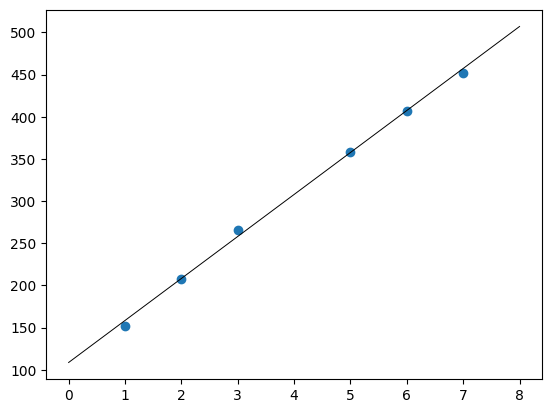

In [148]:
linear_regression(features, labels, learning_rate= 0.01, epochs = 10000)

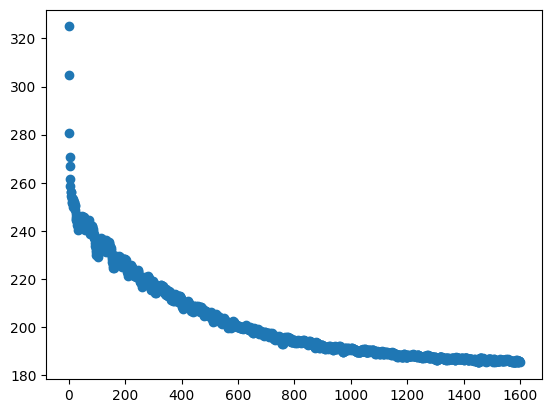

308.42324660133283


(50.749914855220894, 105.42358718044923)

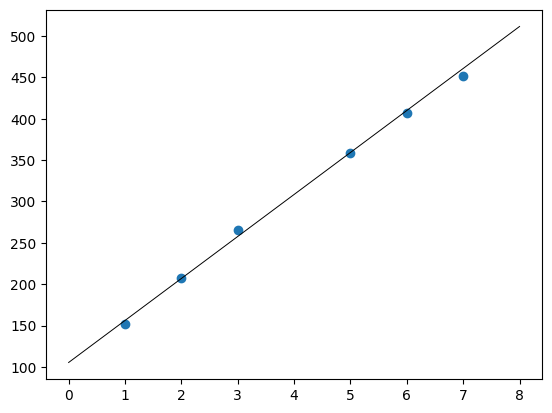

In [149]:
def rmse(labels, predictions):
    n = len(labels)
    diff = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(diff, diff)))
    
def linear_regression_rmse(features, labels, learning_rate = 0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0] * price_per_room + base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate = learning_rate)
    plt.scatter(range(len(errors)), errors)

    plt.show()
    y = price_per_room * 4 + base_price
    print(y)
    draw_points(features, labels)
    draw_line(price_per_room, base_price, 'black', starting = 0, ending = 8)
    return price_per_room, base_price
linear_regression_rmse(features, labels, learning_rate = 0.01, epochs = 1600)

In [427]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 

data = pd.read_csv("Hyderabad.csv")
df = pd.DataFrame(data)

#df.info()

In [428]:

del df['Location']
#del df['JoggingTrack']
#del df['RainWaterHarvesting']
#del df['IndoorGames']
#del df['Intercom']
#del df['24X7Security']
#del df['PowerBackup']
#del df['CarParking']
#del df['MultipurposeRoom']
price = df['Price']
features = df.drop('Price', axis = 1)



In [429]:
df.corr()


,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
Price,1.000000,0.829310,0.614283,0.203878,0.013022,0.068763,0.076059,0.061165,0.065828,0.050957,...,0.029536,-0.003700,0.049295,-0.014067,-0.020505,-0.005373,-0.006059,-0.007628,-0.006858,-0.005895
Area,0.829310,1.000000,0.793565,0.179378,0.043088,0.093148,0.099141,0.081309,0.093165,0.079615,...,0.051778,0.011845,0.081622,0.002862,-0.000402,0.011771,0.011033,0.009901,0.010953,0.012106
No. of Bedrooms,0.614283,0.793565,1.000000,0.136090,0.016765,0.055398,0.063623,0.051222,0.059963,0.044775,...,0.029328,-0.013366,0.062116,-0.023921,-0.024670,-0.011932,-0.012841,-0.017281,-0.012693,-0.013219
Resale,0.203878,0.179378,0.136090,1.000000,0.081881,0.051195,0.055341,0.073040,0.071094,0.064421,...,0.078388,0.113615,0.059494,0.086852,0.073049,0.095333,0.101970,0.108611,0.112524,0.095867
MaintenanceStaff,0.013022,0.043088,0.016765,0.081881,1.000000,0.952863,0.954216,0.964015,0.967709,0.963973,...,0.950637,0.971170,0.964331,0.973057,0.981248,0.977152,0.974862,0.973444,0.974905,0.976960
Gymnasium,0.068763,0.093148,0.055398,0.051195,0.952863,1.000000,0.989644,0.973520,0.970849,0.963838,...,0.957514,0.940831,0.957727,0.945191,0.953655,0.950901,0.950780,0.949130,0.947101,0.950875
SwimmingPool,0.076059,0.099141,0.063623,0.055341,0.954216,0.989644,1.000000,0.976746,0.974147,0.967546,...,0.956308,0.942075,0.960098,0.946378,0.954980,0.951526,0.951403,0.949391,0.947354,0.951693
LandscapedGardens,0.061165,0.081309,0.051222,0.073040,0.964015,0.973520,0.976746,1.000000,0.980454,0.973998,...,0.952697,0.949724,0.968425,0.952056,0.960935,0.955998,0.956167,0.955642,0.955991,0.957040
JoggingTrack,0.065828,0.093165,0.059963,0.071094,0.967709,0.970849,0.974147,0.980454,1.000000,0.976756,...,0.951477,0.951231,0.974066,0.956332,0.965968,0.961301,0.959046,0.956891,0.956309,0.961063
RainWaterHarvesting,0.050957,0.079615,0.044775,0.064421,0.963973,0.963838,0.967546,0.973998,0.976756,1.000000,...,0.952372,0.946877,0.976838,0.950931,0.961856,0.957031,0.954396,0.952402,0.952594,0.956580


In [430]:
print("Corr between price and Area:", df['Price'].corr(df['Area']))
#print("Corr between price and no. of bedrooms:", df['Price'].corr(df['No. of Bedrooms']))
print("Corr between price and Resale:", df['Price'].corr(df['Resale']))

Corr between price and Area: 0.8293098348201344
Corr between price and Resale: 0.203878463408283


-3668250.3933938984 	 10601.969604848462
6933719.211454563


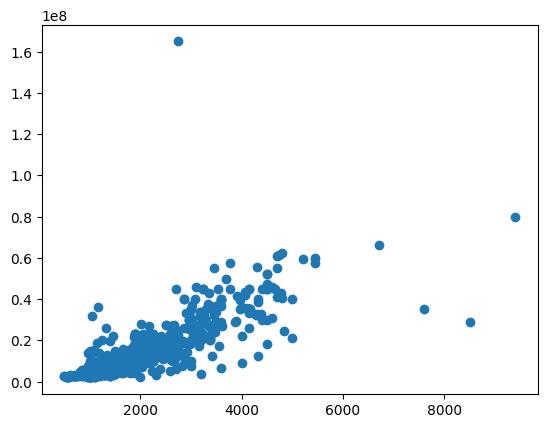

In [431]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size = 0.25, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)

interseption = model.intercept_
coef = model.coef_ 
plt.scatter(df['Area'], df['Price'])
#draw_line(coef, interseption, starting = 0, ending = max(df['Area']))

print(interseption, "\t", coef[0])


def func_predict_price(coef, interseption, area):
    return coef[0] * area + interseption
    
print(func_predict_price(coef, interseption, 1000))
#print(func_predict_price(k, b, 1000))

mean_squared_error_test:      19765399443408.977
mean_squared_error_train:     23550673146531.6
mean_absolute_error:     2345764.720344321
r2_score:		 0.7536325238413827
difference btw MSE_train and MSE_test:  -3785273703122.625
0.7536325238413827
0.689803111330662


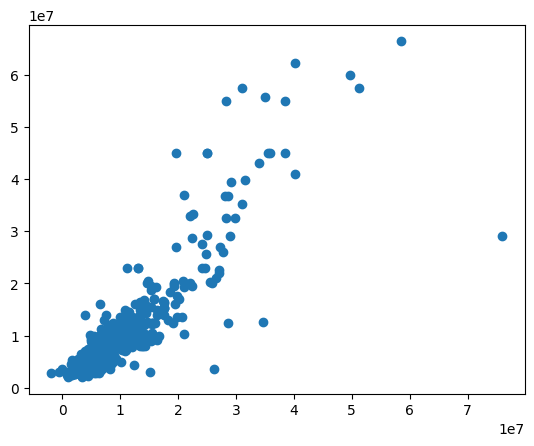

In [433]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
predict_test = model.predict(X_test)
predict_test = np.array(predict_test)
predict_train = model.predict(X_train)
predict_train = np.array(predict_train)
plt.scatter(predict_test, y_test)
print('mean_squared_error_test:     ', mean_squared_error(y_test, predict_test))
print('mean_squared_error_train:    ', mean_squared_error(y_train, predict_train))
print('mean_absolute_error:    ', mean_absolute_error(y_test, predict_test))
print('r2_score:\t\t', r2_score(y_test, predict_test))
#print('difference btw MSE_train and MSE_test: ', mean_squared_error(y_test, predict_test) - mean_squared_error(y_train, predict_train))
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

In [434]:
pd.DataFrame(data = model.coef_, index = X_train.columns, columns = ['coef'])

,coef
Area,1.060197e+04
No. of Bedrooms,-1.754001e+06
Resale,1.464461e+06
MaintenanceStaff,-1.283997e+06
Gymnasium,-5.554364e+05
SwimmingPool,6.102146e+05
LandscapedGardens,1.065628e+06
JoggingTrack,-6.628465e+05
RainWaterHarvesting,-5.362971e+05
IndoorGames,5.553082e+05
